# 01. Importing Libraries

In [40]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [41]:
# Import the data set into Jupyter as a new dataframe
path = r'/Users/ChuahLH/Desktop/Documents/Instacart Basket Analysis'

In [42]:
# Import the final merged dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_final.pkl'))

# 03. Investigate the Data Frame

In [43]:
df_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196.0,1.0,1.0,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196.0,1.0,1.0,...,Non-Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [44]:
df_merged.shape

(32406041, 36)

# 04. Create a bar chart, a histogram, a scatterplot, and a line chart

In [45]:
# Create a bar-chart
df_merged['orders_day_of_week'].value_counts()

0    6204404
1    5660456
6    4496635
2    4213986
5    4205906
3    3840701
4    3783953
Name: orders_day_of_week, dtype: int64

In [46]:
df_merged['orders_day_of_week'].value_counts().sort_index()

0    6204404
1    5660456
2    4213986
3    3840701
4    3783953
5    4205906
6    4496635
Name: orders_day_of_week, dtype: int64

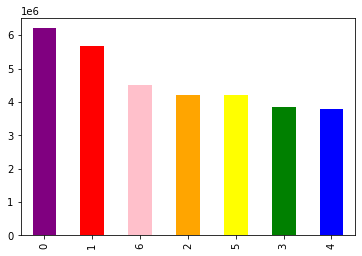

In [47]:
bar = df_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

In [48]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

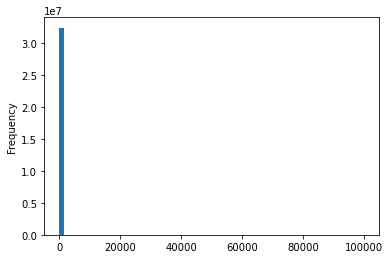

In [49]:
# Create a histograms
df_merged['prices'].plot.hist(bins = 70)

In [50]:
df_merged['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

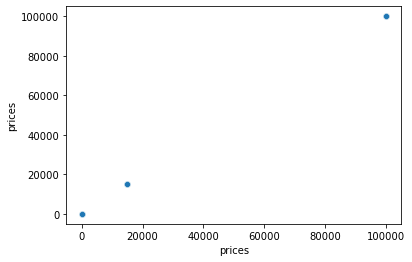

In [51]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_merged)

In [52]:
df_merged.loc[df_merged['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
7805,24261,1435153,1519,26,2,11,6.0,21553.0,15.0,0.0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,24267,1066435,1519,32,3,10,5.0,21553.0,28.0,1.0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,39073,1697208,2409,33,1,19,5.0,21553.0,1.0,0.0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,57126,965345,3531,27,2,19,8.0,33664.0,2.0,0.0,...,Regular customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,61481,2943740,3793,1,2,9,NaN,21553.0,3.0,0.0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32304980,854612,3265389,51346,4,1,17,13.0,33664.0,2.0,1.0,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32309063,2186800,1179092,131671,12,4,9,15.0,33664.0,1.0,0.0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32311991,658416,1226705,39667,7,2,15,20.0,33664.0,14.0,0.0,...,Non-Frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32331229,1583942,3000037,95105,2,4,19,22.0,33664.0,4.0,0.0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [53]:
df_merged.loc[df_merged['prices'] > 100, 'prices'] = np.nan

In [54]:
df_merged['prices'].max()

25.0

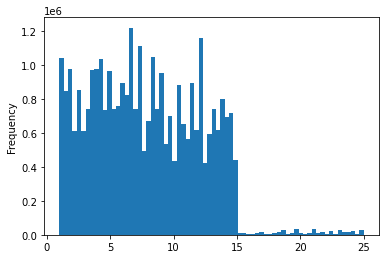

In [55]:
# Create a histograms
histogram1 = df_merged['prices'].plot.hist(bins = 70)

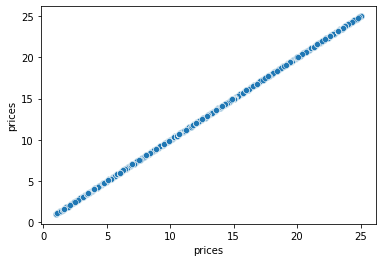

In [56]:
scatterplot_1 = sns.scatterplot(x = 'prices', y = 'prices', data = df_merged)

In [57]:
# Creating Line Chart
df = df_merged[:2000000]

In [58]:
# Set the seed for the random number generator
# 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [59]:
# Create a new list called dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [60]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [61]:
# Store 70 percent in big sample, and 30 percent in small sample
big = df_merged[dev]
small = df_merged[~dev]

In [62]:
#checking the execution for accuraccy
len(df_merged)

32406041

In [63]:
len(big) + len(small)

32406041

In [64]:
# select the columns needed line plot
df_merged_2 = small[['orders_day_of_week', 'prices']]

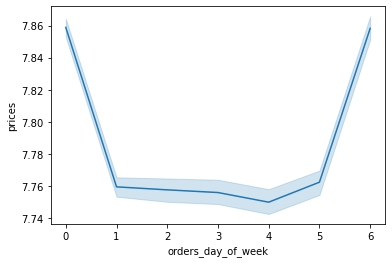

In [65]:
line = sns.lineplot(data = df_merged_2, x = 'orders_day_of_week', y = 'prices')

# 05. Create a histogram of the "order_hour_of_day" column

In [66]:
df_merged['order_hour_of_day'].value_counts()

10    2761862
11    2736242
14    2689251
15    2662246
13    2661057
12    2618613
16    2535313
9     2454273
17    2087721
8     1718182
18    1636566
19    1258352
20     976182
7      891082
21     795658
22     634247
23     402335
6      290500
0      218786
1      115706
5       87964
2       69377
4       53245
3       51281
Name: order_hour_of_day, dtype: int64

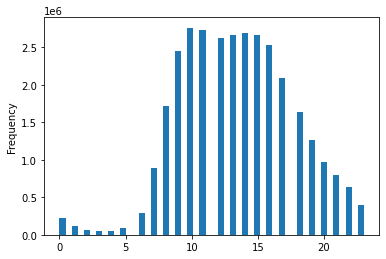

In [67]:
histogram2 = df_merged['order_hour_of_day'].plot.hist(bins = 50)

The above histogram showed the frequency of orders placed at each hour of a day. The x-axis represents the hours (from 0-23) and the y-axis represents the number of total orders placed on each of those hours (in millions of orders). The maximum orders happened at 10am - 2761862.

# 06. Create a bar chart from the "loyalty_flag" column

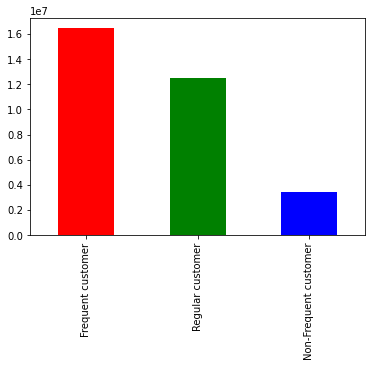

In [68]:
bar2 = df_merged['Frequency_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

The above bar chart showed the largest group of customers are frequent customers, followed by regular customers and non-frequent customers. 

# 07. Check that there is a difference of expenditure (the "prices" column depending on the hour of the day

In [72]:
# select the columns needed line plot
df_merged_3 = small[['order_hour_of_day', 'prices']]

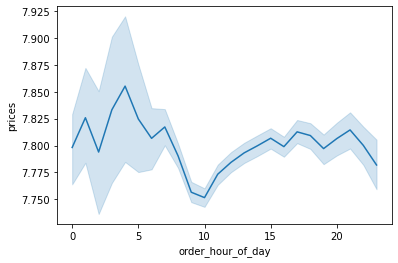

In [73]:
line_2 = sns.lineplot(data = df_merged_3, x = 'order_hour_of_day', y = 'prices')

# 08. Determine the connection between age and family situation by creating a line chart

In [74]:
df_merged_4 = small[['age', 'number_of_dependants']]

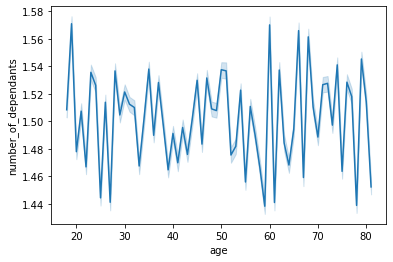

In [75]:
line_3 = sns.lineplot(data = df_merged_4, x = 'age', y = 'number_of_dependants')

The line chart presented the relationship between the customer's age and the number of dependents. The line showed a distinct relationship between age of the customers and the number of dependents.


# 09. To explore the connection between age and spending power using scatterplot. 

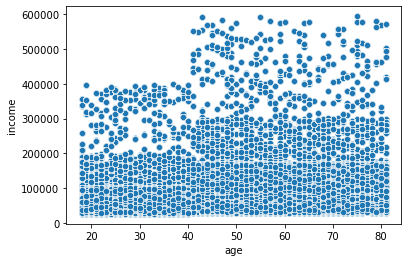

In [76]:
# Create a scatterplot
scatterplot_2 = sns.scatterplot(x = 'age', y = 'income', data = df_merged)

1. Majority of customers between aged 20-40 have a spending power of USD 200,000.
2. Customers aged above 40 years old have a spending power of USD 300,000.
3. Customers aged between 20-40 years old could spend up to USD 400,000.
4. Customers aged 40 and above could spend up to USD 600,000.

# 10. Export Visualisation as "png"

In [77]:
# Save bar - orders day of week
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

In [78]:
# Save histogram - prices
histogram1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'prices.png'))

In [79]:
# Save scatterplot_1 - prices
scatterplot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_1.png'))

In [80]:
# Save line - orders_day_of_week vs prices
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'orders_day_of_week.png'))

In [81]:
# Save histogram2 - order hour of day
histogram2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'order_hour_of_day.png'))

In [82]:
# Save bar2 - orders day of week
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_customer.png'))

In [83]:
# Save line - orders_hour_of_day vs prices
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'order_hour_of_day_line.png'))

In [84]:
# Save line - age vs dependant
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'age_vs_dependant_line.png'))

In [85]:
# Save scatterplot_2 - age vs spending power
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'age_vs_spending_power.png'))